In [2]:
#importamos librerias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
#cargamos los csv
url1 = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2020.csv"
url2 = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2021.csv"
url3 = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2022.csv"

In [4]:
#concatenamos todo en un dataframe
dataFrame = pd.concat(map(pd.read_csv, [url1, url2, url3]), ignore_index=True)
print(dataFrame)

               date      county       state     fips  cases  deaths
0        2020-01-21   Snohomish  Washington  53061.0      1     0.0
1        2020-01-22   Snohomish  Washington  53061.0      1     0.0
2        2020-01-23   Snohomish  Washington  53061.0      1     0.0
3        2020-01-24        Cook    Illinois  17031.0      1     0.0
4        2020-01-24   Snohomish  Washington  53061.0      1     0.0
...             ...         ...         ...      ...    ...     ...
2672252  2022-07-04  Sweetwater     Wyoming  56037.0  11564   126.0
2672253  2022-07-04       Teton     Wyoming  56039.0  10807    16.0
2672254  2022-07-04       Uinta     Wyoming  56041.0   5815    39.0
2672255  2022-07-04    Washakie     Wyoming  56043.0   2481    44.0
2672256  2022-07-04      Weston     Wyoming  56045.0   1643    19.0

[2672257 rows x 6 columns]


In [5]:
#agrupamos por día
print(dataFrame.groupby(by=['date']).sum().groupby(level=[0]).cumsum())
dataFramexDia = dataFrame.groupby(by=['date']).sum().groupby(level=[0]).cumsum()

                   fips     cases     deaths
date                                        
2020-01-21      53061.0         1        0.0
2020-01-22      53061.0         1        0.0
2020-01-23      53061.0         1        0.0
2020-01-24      70092.0         2        0.0
2020-01-25      76151.0         3        0.0
...                 ...       ...        ...
2022-06-30  101394903.0  87474276  1014452.0
2022-07-01  101394903.0  87625966  1014972.0
2022-07-02  101394903.0  87634482  1014986.0
2022-07-03  101394903.0  87644884  1014996.0
2022-07-04  101394903.0  87680546  1015060.0

[896 rows x 3 columns]


In [6]:
#agrupamos los 10 mayores
dataFramexDia = dataFrame.groupby(by=['date']).sum().groupby(level=[0]).cumsum()
dataFrameOrdenado = dataFramexDia.sort_values(['cases'])
dataFramefinal = dataFrameOrdenado.tail(10)
print(dataFramefinal)

                   fips     cases     deaths
date                                        
2022-06-25  101394903.0  86881049  1012480.0
2022-06-26  101394903.0  86899289  1012486.0
2022-06-27  101394903.0  87031268  1012765.0
2022-06-28  101394903.0  87153779  1013306.0
2022-06-29  101394903.0  87350558  1013999.0
2022-06-30  101394903.0  87474276  1014452.0
2022-07-01  101394903.0  87625966  1014972.0
2022-07-02  101394903.0  87634482  1014986.0
2022-07-03  101394903.0  87644884  1014996.0
2022-07-04  101394903.0  87680546  1015060.0


In [7]:
#obtenemos valores del eje x (fecha)
x_values = dataFramefinal.index
print(x_values)

Index(['2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28', '2022-06-29',
       '2022-06-30', '2022-07-01', '2022-07-02', '2022-07-03', '2022-07-04'],
      dtype='object', name='date')


In [8]:
#obtenemos valores del eje y (casos)
y_values = dataFramefinal.cases
print(y_values)

date
2022-06-25    86881049
2022-06-26    86899289
2022-06-27    87031268
2022-06-28    87153779
2022-06-29    87350558
2022-06-30    87474276
2022-07-01    87625966
2022-07-02    87634482
2022-07-03    87644884
2022-07-04    87680546
Name: cases, dtype: int64


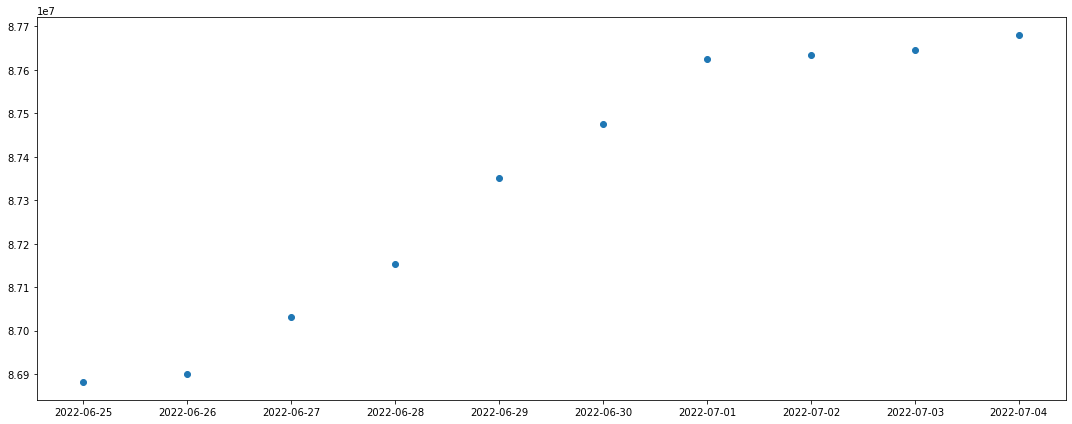

In [9]:
#graficamos
plt.plot_date(x_values, y_values)
plt.gcf().set_size_inches(15, 6)
plt.tight_layout()
plt.show()